In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [11]:
def page_rank(G, alpha=0.5, max_iter=200):
    """Return the PageRank of the nodes in the graph. 

    :param dict G: the graph
    :param float d: the damping factor
    :param int max_iter: max number of iterations
    """
    d = alpha
    nodes = G.nodes() # graph의 nodelist
    
    # 인접행렬(matrix) 생성
    # 각각의 값은 연결된 edge의 가중치 (None을 넘겨주어 weight를 1로 설정)
    matrix = nx.adjacency_matrix(G, nodelist=nodes, weight=None)
#     print(matrix)
    out_degree = matrix.sum(axis=0) # 각 노드의 out going edge 갯수
    print(out_degree)
    
    # 연결되어있는 edge weight들을 사용해서 p.64의 수식에서의 summation부분을 구해줌.
    weight = matrix / out_degree
    
    N = G.number_of_nodes() # graph의 총 node 수
    pr = np.ones(N).reshape(N, 1) * 1./N # 초기 rankpage의 값을 1/N으로 설정
    print(pr)

    for it in range(max_iter):
        old_pr = pr[:] # pr을 old_pr에 복사함. (독립적인 객체로 복사 (shallow copy))
        pr = d * weight.dot(pr) + (1-d)/N
        
    return list(pr)

In [21]:
# homework4 implementation function
def page_rank(G, alpha=0.5, max_iter=100):
    """Return the PageRank of the nodes in the graph. 

    :param networkx.classes.digraph.DiGraph G: the graph
    :param float alpha: alpha
    :param max_iters: the maximum number of `t`

    The algorithm returns page rank values by power method.

    Returns
    
        list pr: the page rank values on nodes in G    
        
    """ 
    # graph의 Node개수만큼의 list 생성, 초깃값은 [(1/node개수) * alpha(node가 선택될 확률)]로 setting
    pr = [ alpha/G.number_of_nodes() for _ in G.nodes() ]

    # adj_list : dict_itemiterator 
    adj_list = G.adjacency() # page간의 인접리스트
        
    # p.64 수식의 summation부분을 구하는 함수 (위의 인접행렬을 쓴 코드에서의 weight)
    def get_new_pr(adjlist, pr, d):
        n = len(pr) # node의 개수
        old_pr = pr[:] # 복사 ( old_pr <- pr )
        weight = [0 for _ in range(n)]
        
        for cur_node in adjlist:
            linked_node = cur_node[1].keys() # 현재 node와 연결되어있는 node list
            out_deg = len(linked_node) # 현재 node의 out_degree
            
            for idx in range(n):
                pr[idx] = (1 - d) / n 
                # 현재 node로부터 연결되어있는 node인 경우 == incoming edge 존재
                if (idx in linked_node):
                    # weight update하는데 모든 incoming node에 대한 pr을 더해야함.
                    # 따라서 weight를 바로 pr에 더하는 것이 아닌 weight를 저장 후 마지막에 한꺼번에 더함.
                    weight[idx] += (old_pr[cur_node[0]] / out_deg)

        # incoming edge에 따라 weight 계산했으니 기본 pr 에 더해 최종 pr 계산
        for idx in range(n):
            pr[idx] += (weight[idx] * d)
        
        return pr
                    
            
    for it in range(max_iter):
        pr = get_new_pr(adj_list, pr, alpha)


    return pr

In [19]:
G = nx.karate_club_graph().to_directed()

for node in G.adjacency():
    print(node)
    print()

(0, {1: {'weight': 4}, 2: {'weight': 5}, 3: {'weight': 3}, 4: {'weight': 3}, 5: {'weight': 3}, 6: {'weight': 3}, 7: {'weight': 2}, 8: {'weight': 2}, 10: {'weight': 2}, 11: {'weight': 3}, 12: {'weight': 1}, 13: {'weight': 3}, 17: {'weight': 2}, 19: {'weight': 2}, 21: {'weight': 2}, 31: {'weight': 2}})

(1, {0: {'weight': 4}, 2: {'weight': 6}, 3: {'weight': 3}, 7: {'weight': 4}, 13: {'weight': 5}, 17: {'weight': 1}, 19: {'weight': 2}, 21: {'weight': 2}, 30: {'weight': 2}})

(2, {0: {'weight': 5}, 1: {'weight': 6}, 3: {'weight': 3}, 7: {'weight': 4}, 8: {'weight': 5}, 9: {'weight': 1}, 13: {'weight': 3}, 27: {'weight': 2}, 28: {'weight': 2}, 32: {'weight': 2}})

(3, {0: {'weight': 3}, 1: {'weight': 3}, 2: {'weight': 3}, 7: {'weight': 3}, 12: {'weight': 3}, 13: {'weight': 3}})

(4, {0: {'weight': 3}, 6: {'weight': 2}, 10: {'weight': 3}})

(5, {0: {'weight': 3}, 6: {'weight': 5}, 10: {'weight': 3}, 16: {'weight': 3}})

(6, {0: {'weight': 3}, 4: {'weight': 2}, 5: {'weight': 5}, 16: {'weight'

[0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354, 0.004411764705882354]


Text(0.5, 0.98, '  Page Rank')

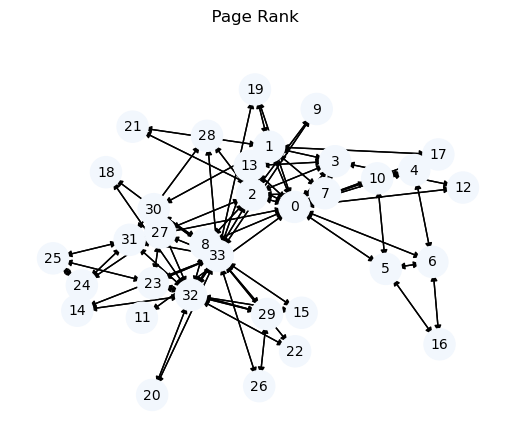

In [20]:
G = nx.karate_club_graph().to_directed()
pos = nx.spring_layout(G, k=1.1, seed=1234)
f, ax = plt.subplots()

pr = page_rank(G, alpha=0.85, max_iter=100)
print(pr)

plt_nodes = nx.draw_networkx_nodes(
    G, pos,
    ax=ax,
    nodelist=G.nodes(),
    node_color=pr,
    alpha=1,
    node_size=500,
    cmap=plt.cm.Blues,
    vmin=0,
    vmax=0.15
)
ax.axis("off")
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10)
f.suptitle(f"  Page Rank")